Streams Library Log-book
=========================

This notebook keeps record of the intermediate computations made to generate some of the stream's footprints stored in the Streams Library

In [10]:
import numpy as np
import scipy
import galstreams
import myutils
import bovy_coords as bovyc
import seaborn as sns
import os
import pandas as pd
import astropy.coordinates
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Load stream library
streams=galstreams.MWStreams(verbose=False,gcstep=0.05,N=8000)

In [12]:
streams.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'Pal13', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiuchus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])

In [13]:
streams["Pal13"]

Alpheus
-------

In [14]:
#Alpheus
dec=np.linspace(-69.,-45.,20)
ra = 32.116-0.00256*dec-0.00225*(dec**2)  #from Grillmair 2013
scipy.savetxt("lib_by_star.alpheus.grillmair2013.dat",np.array([ra,dec]).T,
                 fmt='%.1f %+.1f 2. ',header="ra dec D")
# for raa,deca in zip(ra,dec):
#  print '%.1f %+.1f 2. ' % (raa,deca)

Hermus
------

In [5]:
#Hermus
dec=np.linspace(5.,+50.,200)
ra=241.571 + 1.37841*dec -0.148870*(dec**2) + 0.00589502*(dec**3) -1.03927E-4*(dec**4) + 7.28133E-7*(dec**5)
#from Grillmair 2014
# scipy.savetxt("lib_by_star.hermus.grillmair2014.dat",np.array([ra,dec]).T,
#                  fmt='%.1f %+.1f 2. ',header="ra dec D")

Hyllus
------

In [6]:
#Hyllus
dec=np.linspace(11.,+34.,200)
ra=255.8150-0.78364*dec + 0.01532*dec**2
 #from Grillmair 2014
#scipy.savetxt("lib_by_star.hyllus.grillmair2014.dat",np.array([ra,dec]).T,
#                  fmt='%.1f %+.1f 2. ',header="ra dec D")

Orphan
------

In [23]:
#Orphan footprint used up to Dec-2018.
#This is the southern extension of the Orphan stream, reported by Grillmair+ 2015 (ApJ 812, 1–5)
#Orphan extension, Grillmair
# orphan_ext_delta=np.linspace(-18.,-38.,4)
# orphan_ext_alpha=163.147-0.0896*orphan_ext_delta+0.00804*(orphan_ext_delta**2)
# orph_l,orph_b=bovyc.radec_to_lb(orphan_ext_alpha,orphan_ext_delta,degree=True).T
# for la,ba in zip(orph_l,orph_b):
#  print '%.1f %+.1f -1. ' % (la,ba)

# THIS BLOCK HAS BEEN DEPRECATED. 
#NEW ORPHAN FOOTPRINT FROM Koposov et al. 2019

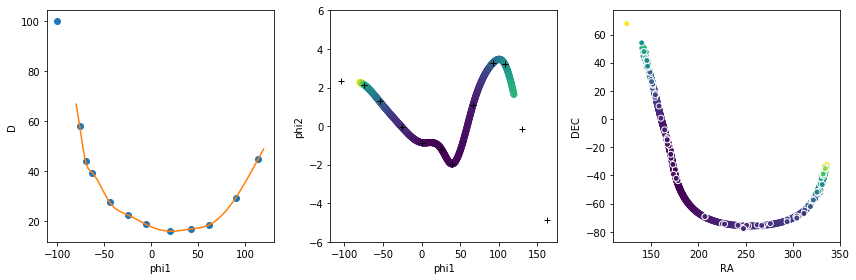

In [5]:
#Orphan footprint from Koposov et al. 2019 - Gaia DR2 RRLs.

#Knots for D(phi1) interpolation
phi1_Dknot=np.array([-100.0,-76.2169,-69.9684,-63.1307,-44.2712,-25.0268,-5.3975,20.0052,42.3287,61.958,90.0548,114.3027])   
Dknot=np.array([100.0,58.0,44.0,39.441,27.6252,22.5353,18.7178,15.9911,16.9,18.5361,29.2612,44.8945])
#phi1-phi2
#Knots for phi2(phi1) stream track interpolation
phi1k=np.array([-105.186,-74.7184,-54.4067,-25.4375,0.2019,25.8413,39.1605,66.9643,93.1032,108.0872,129.8974,162.5293])
phi2k=np.array([2.315,2.148,1.2797,-0.0562,-0.8577,-1.1917,-1.9598,1.1127,3.2835,3.2167,-0.1564,-4.8653])
#Interpolators
orphan_Dspline=scipy.interpolate.CubicSpline(phi1_Dknot,Dknot,bc_type='natural',extrapolate=True)
orphan_phi2spline=scipy.interpolate.CubicSpline(phi1k,phi2k,bc_type='natural')
#Plot to check
phi1s=np.linspace(-80,120,500)
Ds=orphan_Dspline(phi1s)
phi2s=orphan_phi2spline(phi1s)
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.plot(phi1_Dknot,Dknot,'o')
plt.plot(phi1s,Ds,'-')
plt.xlabel("phi1")
plt.ylabel("D")
plt.subplot(132)
plt.plot(phi1k,phi2k,'k+')
plt.scatter(phi1s,phi2s,c=Ds,marker='o')
plt.ylim(-6,6)
plt.xlabel("phi1")
plt.ylabel("phi2")


ones=np.ones_like(phi1s)
#Rotation matrix from Koposov+ 2019 appendix
Mrot_radec_to_phi12=np.matrix([[-0.44761231,-0.08785756,-0.88990128],
                              [-0.84246097,0.37511331,0.38671632],
                              [0.29983786,0.92280606,-0.2419219]])
Mrot_phi12_to_radec= np.linalg.inv(Mrot_radec_to_phi12)
xrot,yrot,zrot=bovyc.lbd_to_XYZ(phi1s,phi2s,ones,degree=True).T
ras,decs=np.array([]),np.array([])
#Rotate phi1,phi2 back to RA,DEC
for i in range(phi1s.size):
 hel=np.matmul(Mrot_phi12_to_radec,np.array([xrot[i],yrot[i],zrot[i]]))[0]
 xhel,yhel,zhel=hel[0,0],hel[0,1],hel[0,2]
 ra,dec,dum=bovyc.XYZ_to_lbd(xhel,yhel,zhel,degree=True)
 ras=np.append(ras,ra)
 decs=np.append(decs,dec)

#Double check coordinate rotation with OATs RRLs 
rrs=pd.read_csv("../../../../gaia/aspen_orphan/orphan_rrl_members.alldata.csv")
plt.subplot(133)
plt.scatter(ras,decs,c=Ds,marker='o')
plt.scatter(rrs.RA,rrs.DEC,c=rrs.DIST,marker='o',edgecolors='w')
plt.xlabel("RA")
plt.ylabel("DEC")

plt.tight_layout()

#Save stream track - print only in the range of observed RRLs (this track includes the previously known one)
# scipy.savetxt("lib_by_star.orphan.koposov2019.dat",
#               np.array([ras,decs,Ds]).T,fmt="%8.2f %8.2f %6.1f",
#               header="     RA     DEC  D_kpc")

Pal 15 and Eridanus
-------------------

Computed from position angle (PA) and length of the tails from Myeong+ 2017. For each cluster they report the PA and length *l* for the 'tail 1' and 'tail 2', the two tails coming out of the cluster.

In [42]:
#Pal 15
rac,decc=255.01,-0.5419
l1,PA1=59./60.,np.radians(340.)
l2,PA2=29./60.,np.radians(150.)

delta_ra1=l1*np.sin(PA1)/np.cos(np.radians(decc))
delta_dec1=l1*np.cos(PA1)
delta_ra2=l2*np.sin(PA2)/np.cos(np.radians(decc))
delta_dec2=l2*np.cos(PA2)

#print delta_ra1*np.cos(np.radians(decc)),delta_dec1
#print delta_ra2*np.cos(np.radians(decc)),delta_dec2

ra1,dec1=rac -delta_ra1,decc-delta_dec1
ra2,dec2=rac -delta_ra2,decc-delta_dec2

print ra1, dec1
print ra2,dec2

255.346334851 -1.46593107711
254.768322524 -0.123321054838


In [39]:
#Eridanus
rac,decc=66.1854,-21.1869
l1,PA1=18./60.,np.radians(40.)
l2,PA2=11./60.,np.radians(220.)

delta_ra1=l1*np.sin(PA1)/np.cos(np.radians(decc))
delta_dec1=l1*np.cos(PA1)
delta_ra2=l1*np.sin(PA2)/np.cos(np.radians(decc))
delta_dec2=l1*np.cos(PA2)

#print delta_ra1*np.cos(np.radians(decc)),delta_dec1
#print delta_ra2*np.cos(np.radians(decc)),delta_dec2

ra1,dec1=rac -delta_ra1,decc-delta_dec1
ra2,dec2=rac -delta_ra2,decc-delta_dec2

print ra1, dec1
print ra2,dec2

65.9785843122 -21.4167133329
66.3922156878 -20.9570866671


Murrumbidgee
-------------

[  0.93630532 359.19720086] [12.54284762 15.24374792]
[105.14926078 103.92288714] [-48.67524327 -45.60129203]
[133.15351056 131.14483974] [-40.68060698 -38.38978989]


(-90, 20.0)

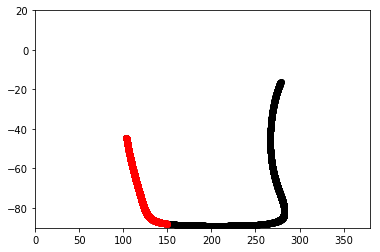

In [11]:
#Murrumbidgee, From Grillmair 2017b
dec=np.linspace(-65,+16.,3000)  
#dec range is not clear in G17's paper, the fiducial point is not included in the mentioned
#range -65<dec<-30.
#print bovyc.lb_to_radec(180.,-5.)
ra=367.893 -0.4647*dec -0.00862*dec**2 + 0.000118*dec**3 +1.2347e-6*dec**4 -1.13758e-7*dec**5
ra=ra % 360.

ll,bb=bovyc.radec_to_lb(ra,dec,degree=True).T
#mask=(-65<bb) & (bb<-30.)
mask=ll<150.

#for raa,deca in zip(ra,dec)[:2]:
# print '%6.1f %+6.1f 20. ' % (raa,deca)  

plt.plot(ll,bb,'ko')
plt.plot(ll[mask],bb[mask],'ro')
ras,decs=ra[mask],dec[mask]
D=20.*np.ones_like(ras)

mur=galstreams.Footprint(ras,decs,'Murr',Rhel=D,cootype='equ')
print mur.ra[::100][-2:],mur.dec[::100][-2:]
print mur.l[::100][-2:],mur.b[::100][-2:]
print mur.phi[::100][-2:],mur.theta[::100][-2:]


mur_l,mur_b=galstreams.gcutils.get_gc_for_pole(160.,+28.)
mur=galstreams.Footprint(mur_l,mur_b,'Murrumbidgee',Rhel=20.+0.*mur_l,degree=True,cootype='gal')
#plt.plot(mur.ra,mur.dec)

ofootn='lib_by_star.murrumbidgee.grillmair2017.dat'
# scipy.savetxt(ofootn,np.array([ras,decs,D]).T,header='degrees, kpc\n#RA   DEC  Rhel',
#               fmt='%.2f %+.2f %.1f')


plt.xlim(0.,380.)
plt.ylim(-90,20.)

Molonglo
--------

(-90, 0.0)

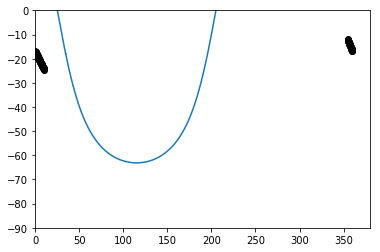

In [7]:
#Molonglo, From Grillmair 2017b
dec=np.linspace(-24.5,-12.,100)
ra=345.017 - 0.5843*dec + 0.0182*dec**2
ra=ra % 360.
dist=20.*np.ones_like(ra)

#for raa,deca in zip(ra,dec):
# print '%.1f %+.1f 20. ' % (raa,deca)   
 
# ofootn='lib_by_star.molonglo.grillmair2017.dat'
# scipy.savetxt(ofootn,np.array([ra,dec,dist]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')
    
mur_l,mur_b=galstreams.gcutils.get_gc_for_pole(193.,+22.)
D=20.*np.ones_like(mur_l)
mur=galstreams.Footprint(mur_l,mur_b,'Monlonglo',Rhel=D,degree=True,cootype='gal')    
plt.plot(ra,dec,'ko')   
plt.plot(mur.ra,mur.dec)
plt.xlim(0.,380.)
plt.ylim(-90,0.)

Orinoco
--------

[ 359.  359.] [-25. -25.]
[ 39.52826303  39.52826303] [-77.37641038 -77.37641038]
[ 151.52370473  151.52370473] [-73.35567309 -73.35567309]


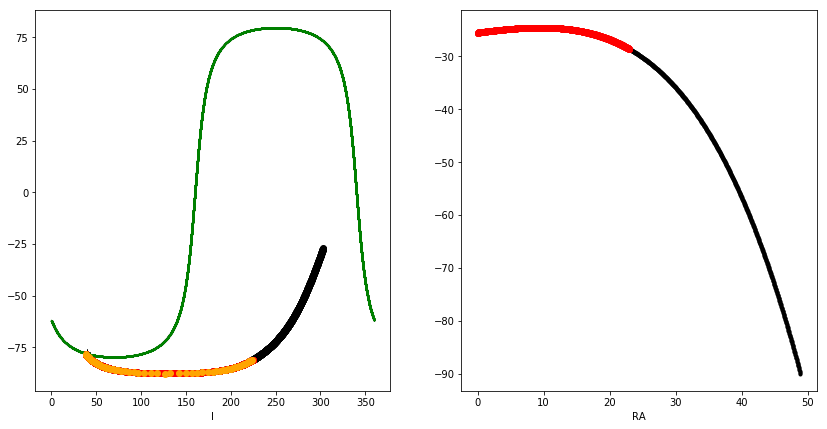

In [22]:
ra = np.linspace(0.,360.,10000)
dec = -25.5146 + 0.1672*ra -0.003827*ra**2 -0.0002835*ra**3 -5.3133e-6*ra**4
ra,dec=ra[np.abs(dec)<=90],dec[np.abs(dec)<=90]
maskb=(ra>(360-36)) | (ra<23) 
ras,decs=ra[maskb],dec[maskb]
dist=20.*np.ones_like(ras)


ll,bb=bovyc.radec_to_lb(ra,dec,degree=True).T

gcl,gcb=galstreams.gcutils.get_gc_for_pole(250.,-10.3)
origc=galstreams.Footprint(gcl,gcb,'gcOri',cootype='gal',degree=True)

fid_ra,fid_dec=np.array([ 359.,359.]) ,np.array([ -25.,-25.]) 
orifid=galstreams.Footprint(fid_ra,fid_dec,'fidOri',Rhel=20.+0.*fid_ra,cootype='equ',degree=True)
print orifid.ra,orifid.dec
print orifid.l,orifid.b
print orifid.phi,orifid.theta

plt.figure(1,figsize=(14,7))
plt.subplot(121)
plt.plot(ll,bb,'ko')
plt.plot(ll[maskb],bb[ maskb],'ro')
plt.plot(origc.l,origc.b,'g.',ms=1)
plt.plot(orifid.l,orifid.b,'k+')
plt.xlabel('l')

plt.plot(streams['Orinoco'].l,streams['Orinoco'].b,'o',color='orange')

plt.subplot(122)
plt.plot(ra,dec,'k.')
#plt.plot(ras0,decc0,'bo')
plt.plot(ras,decs,'ro')

plt.xlabel('RA')

#Overwrite Orinoco's footprint
ofootn='lib_by_star.orinoco.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ras,decs,dist]).T,header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')
#for raa,deca in zip(ras,decc):
# print '%.1f %+.1f 20. ' % (raa,deca)   


Kwando
-------

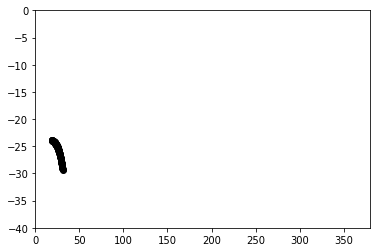

In [5]:
ras = np.linspace(19.,31.,100)
decs = -7.817 -2.354*ras +0.1202*ras**2 -0.00215*ras**3 
dist=20*np.ones_like(ras)

#st_l,st_b=galstreams.gcutils.get_gc_for_pole(237.,+13.)
#st=galstreams.Footprint(st_l,st_b,'Kwando',degree=True,cootype='gal')    
plt.plot(ras,decs,'ko')   
#plt.plot(st.ra,st.dec)
plt.xlim(0.,380.)
plt.ylim(-40.,0.)

#for raa,deca in zip(ras,decs):
# print '%.1f %+.1f 20. ' % (raa,deca)   

ofootn='lib_by_star.kwando.grillmair2017.dat'
scipy.savetxt(ofootn,np.array([ras,decs,dist]).T,
              header='degrees, kpc\n#RA   DEC  Rhel',fmt='%.2f %+.2f %.1f')

# S1-4 streams (Myeong et al. 2018)
*These streams/moving groups are too close or even surround the Sun, hence they are excluded from the library*

In [ ]:
#From Table 1, Myeong, et al. Monthly Notices RAS 475, 1537–1548 (2018). 
#Coordinates are galactocentric with Sun at +8.5 (approx., the paper is not explicit)
xyz_medians=[ (8.1,-0.2,2.8), (8.7,0.3,0.8), (8.6,0.5,3.5), (8.5,0.6,4.1)]
xyz_dispersions=[(0.8,1.2,1.9),(0.6,1.0,2.0), (1.1,1.5,1.9), (1.0,1.7,3.6)]
sns.set_style("whitegrid")
plt.figure(1,figsize=(12,8))
for ii in range(len(xyz_medians)):
    xs=np.random.normal(loc=xyz_medians[ii][0],scale=xyz_dispersions[ii][0],size=200)
    ys=np.random.normal(loc=xyz_medians[ii][1],scale=xyz_dispersions[ii][1],size=200)
    zs=np.random.normal(loc=xyz_medians[ii][2],scale=xyz_dispersions[ii][2],size=200)
    plt.subplot(2,4,ii+1)
    plt.title("S{0}".format(ii+1))
    plt.plot(xs,ys,'o',alpha=0.5)
    plt.grid(axis='both',which='both',lw=1)
    
    #Convert to heliocentric coords
#     ss=astropy.coordinates.SkyCoord(xs-8.5,ys,zs, unit='kpc',
#                                 representation='cartesian', frame='galactic')
    plt.subplot(2,4,5+ii)
#     plt.plot(ss.icrs.galactic.l,ss.icrs.galactic.b,'o',alpha=0.5)
    #Double check
    ll,bb,dd=bovyc.XYZ_to_lbd(xs-8.5,ys,zs,degree=True).T
    #plt.plot(ll,bb,'o',alpha=0.5)
    ssg=astropy.coordinates.SkyCoord(l=ll*astropy.units.deg,b=bb*astropy.units.deg,frame='galactic')
    plt.plot(ssg.l.wrap_at(180.*astropy.units.deg),ssg.b,'x')
plt.tight_layout()

#plt.plot(ssh.ra,ssh.dec,'o')

# Jet Stream (Jethwa et al. 2017)

133.756858247 -27.7023455296
141.998255824 -17.8150504219


Text(138.05,-22.8076,u'Jet')

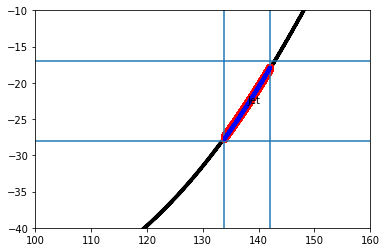

In [8]:
#props
dist=28.6 #kpc
width=0.18
#RA-DEC pole
gcra_all,gcdec_all=galstreams.gcutils.get_gc_for_pole(64.983, 34.747,degree=True,dlat=width)

plt.plot(gcra_all,gcdec_all,'k.',ms=1)

#Limit to reported RA and DEC ranges
ramin,ramax=15.*(8.+55./60.),15*(9.+28./60.)
decmin,decmax=-28.,-17.
#print ramin, ramax, decmin, decmax

jetmask=(gcra_all>=ramin) & (gcra_all<=ramax) & (gcdec_all>=decmin) & (gcdec_all<=decmax)
gcra_jet,gcdec_jet=gcra_all[jetmask],gcdec_all[jetmask]

plt.plot(gcra_jet,gcdec_jet,'ro')

plt.axvline(ramin)
plt.axvline(ramax)
plt.axhline(decmin)
plt.axhline(decmax)

plt.ylim(-40,-10)
plt.xlim(100,160)

#Print only end-points so this can be defined by lib_by_pair
print gcra_jet[0],gcdec_jet[0]
print gcra_jet[-1],gcdec_jet[-1]

#Double checking
plt.plot(streams['Jet'].ra,streams['Jet'].dec,'bo',ms=2.)
plt.text(streams['Jet'].cra,streams['Jet'].cdec,'Jet',horizontalalignment='left')
#for raa,deca in zip(gcra_jet,gcdec_jet)[]:
# print '%.2f %.2f %.1f ' % (raa,deca,dist)   

# DES STREAMS 

Indus 14.0
Jhelum 11.0
Ravi 20.0
Chenab 35.0
Elqui 50.0
Aliqa_Uma 31.0
Turbio 18.0
Willka_Yaku 34.0
Turranburra 33.0
Wambelong 20.0
Palca 38.0


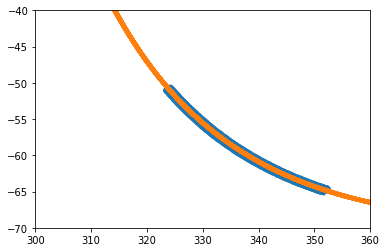

In [3]:
plt.plot(streams['Indus'].ra,streams['Indus'].dec,'.')
gcra,gcdec=galstreams.gcutils.get_gc_for_pole(24.8,21.6,degree=True)
plt.plot(gcra,gcdec,'.')
plt.xlim(300,360)
plt.ylim(-70,-40)

for des in ['Indus','Jhelum','Ravi','Chenab','Elqui','Aliqa_Uma','Turbio','Willka_Yaku','Turranburra'
            ,'Wambelong','Palca']:
   print des,streams[des].Rgal.mean().round()


# Gaia-1,2,3,4,5 streams (Malhan, Ibata & Martin 2018)

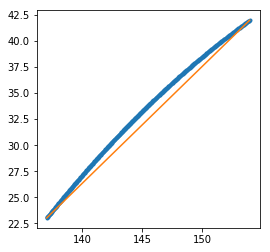

In [4]:
plt.figure(1,figsize=(4,4))
NG='5'
plt.plot(streams['Gaia-'+NG].ra,streams['Gaia-'+NG].dec,'.')
plt.plot(streams['Gaia-'+NG].ra[[0,-1]],streams['Gaia-'+NG].dec[[0,-1]],'-')
#plt.xlim(180,200)
#plt.ylim(-20,0.)

Svol Stream
===============

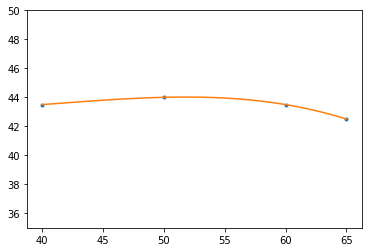

In [4]:
b = np.array([40., 50., 60., 65.])
l = np.array([43.5,44.,43.5,42.5])
d = np.array([7.8,7.8,7.8,7.8])

bs=np.linspace(np.min(b),np.max(b),100)
z=np.polyfit(b,l, deg=3)
l_svol=np.poly1d(z)
ls = l_svol(bs)

z=np.polyfit(b,d, deg=3)
d_svol=np.poly1d(z)
ds = d_svol(bs)



plt.plot(b,l,'.')
plt.plot(bs,ls)
plt.ylim(35,50)

ofootn='lib_by_star.svol.dat'
scipy.savetxt(ofootn,np.array([ls,bs,ds]).T,
              header='degrees, kpc\nl   b  Rhel',fmt='%.2f %+.2f %.1f')

**300S = The 300 km/s stream**
================================================

In [42]:
tr= '''164.00, 13.72
161.54, 14.43
159.33, 15.02
158.04, 15.27
156.63, 15.39
154.63, 15.60
153.33, 15.77
152.58, 15.90
151.21, 16.06
150.17, 16.02
148.83, 15.90
148.00, 15.81'''


In [39]:
import csv

In [43]:
reader = csv.reader(tr.split('\n'), delimiter=',')
#np.array(list(reader)).as_type(float)
ll=np.array(list(reader)).astype(float)

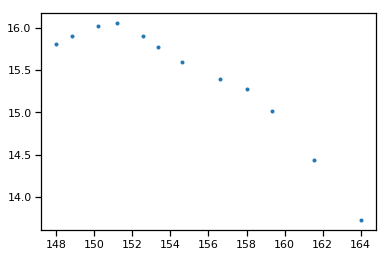

In [44]:
plt.plot(ll[:,0],ll[:,1],'.')

**Save ASCII Footprints**
=========================

In [5]:
#Load stream library
streams=galstreams.MWStreams(verbose=False,gcstep=0.05,N=8000)
#Downsize Sgr footprint
print(streams['Sgr-L10'].ra.size)
mask=np.arange(streams['Sgr-L10'].ra.size)[::5]
streams['Sgr-L10'].mask_footprint(mask)
print(streams['Sgr-L10'].ra.size)

/Users/cmateu/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


100000
20000


### Save footprints in individual files

In [6]:
#-------------Save footprints in individual files-------------------------
head='#%9s %10s %10s %10s %10s %10s %10s %10s %12s\n' % ('RA_deg','DEC_deg','l_deg','b_deg','Rhel_kpc',
                                                'phi_deg','theta_deg','Rgal_kpc','parallax_mas')
for skey in streams.keys():
    #if '/' in skey: skey.replace('/','-')
    ofilen='../../footprints/individual_footprints/galstreams.footprint.%s.dat' % (skey.replace('/','-'))
    print('Saving footprint for stream',skey,'in',ofilen)

    ofile=open(ofilen,'w')
    ofile.write(head)

    Rgal=streams[skey].Rgal
    phi=streams[skey].phi
    theta=streams[skey].theta
    parallax=1./streams[skey].Rhel
    if Rgal is None: Rgal=phi=theta=-1*np.ones_like(streams[skey].l)
    scipy.savetxt(ofile,np.array([streams[skey].ra,streams[skey].dec,
                                   streams[skey].l,streams[skey].b,
                                   streams[skey].Rhel,
                                   phi,theta,Rgal,parallax]).T,
                                   fmt='%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f %12.6f')
    ofile.close()

Saving footprint for stream VOD/VSS in ../../footprints/individual_footprints/galstreams.footprint.VOD-VSS.dat
Saving footprint for stream Monoceros in ../../footprints/individual_footprints/galstreams.footprint.Monoceros.dat
Saving footprint for stream EBS in ../../footprints/individual_footprints/galstreams.footprint.EBS.dat
Saving footprint for stream Her-Aq in ../../footprints/individual_footprints/galstreams.footprint.Her-Aq.dat
Saving footprint for stream PAndAS in ../../footprints/individual_footprints/galstreams.footprint.PAndAS.dat
Saving footprint for stream Tri-And in ../../footprints/individual_footprints/galstreams.footprint.Tri-And.dat
Saving footprint for stream Tri-And2 in ../../footprints/individual_footprints/galstreams.footprint.Tri-And2.dat
Saving footprint for stream PiscesOv in ../../footprints/individual_footprints/galstreams.footprint.PiscesOv.dat
Saving footprint for stream EriPhe in ../../footprints/individual_footprints/galstreams.footprint.EriPhe.dat
Saving 

### Save footprints in a single file

In [7]:
#-------------Save footprints in a single file-------------------------
head='#%9s %10s %10s %10s %10s %10s %10s %10s %12s %4s %6s %-12s\n' % ('RA_deg','DEC_deg','l_deg','b_deg','Rhel_kpc',
                                                'phi_deg','theta_deg','Rgal_kpc','parallax_mas',
                                                'NSt','IDst','StreamName')

ofilen='../../footprints/galstreams.footprint.ALL.dat'
ofile=open(ofilen,'w')
ofile.write(head)

olfilen='../../footprints/galstreams.footprint.ALL.reflabels.dat'
olfile=open(olfilen,'w')
olfile.write(head)

snum=0
for skey in streams.keys():
    
    sname=skey
    if '-' in skey: sname=sname.replace('-','')
    if '/' in skey: sname=sname.replace('/','')
    shortname=streams[skey].sname     
    print('Saving footprint for stream %s as %s (%s)' % (skey,sname,shortname))

    Rgal=streams[skey].Rgal
    phi=streams[skey].phi
    theta=streams[skey].theta
    parallax=1./streams[skey].Rhel
    snum=snum+1 #unique numerical streamID
    
    if Rgal is None: Rgal=phi=theta=-1*np.ones_like(streams[skey].l)
        
    #fullnames=['Tri/Pis','VOD/VSS','Sgr-L10','NGC5466','PS1-A','PS1-B','PS1-C','PS1-D','PS1-E',
    #           'Pal15','Pal5','PAndAS','ATLAS']    
    #if skey not in fullnames: shortname=sname[:3]    
    #else: shortname=sname
        
    for i in range(streams[skey].ra.size): 
        ofile.write('%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f %12.6f %4s %6s %-12s\n' %
                    (streams[skey].ra[i],streams[skey].dec[i],streams[skey].l[i],streams[skey].b[i],
                     streams[skey].Rhel[i],phi[i],theta[i],Rgal[i],parallax[i],snum,shortname,sname))
    
    #one line per stream, to store stream ref point for label    
    olfile.write('%10.4f %10.4f %10.4f %10.4f %10.3f %10.4f %10.4f %10.3f %12.6f %4s %6s %-12s\n' %
                    (streams[skey].cra,streams[skey].cdec,streams[skey].cl,streams[skey].cb,
                     np.mean(streams[skey].Rhel),phi[0],theta[0],Rgal[0],parallax[0],
                     snum,shortname,sname))
        
        
ofile.close()
olfile.close()

print('Saving Compressed Output: ../../footprints/galstreams.footprint.ALL.dat')
os.system("gzip -vf ../../footprints/galstreams.footprint.ALL.dat")

Saving footprint for stream VOD/VSS as VODVSS (VOD/VSS)
Saving footprint for stream Monoceros as Monoceros (Mon)
Saving footprint for stream EBS as EBS (EBS)
Saving footprint for stream Her-Aq as HerAq (HerAq)
Saving footprint for stream PAndAS as PAndAS (PAndAS)
Saving footprint for stream Tri-And as TriAnd (TriAnd)
Saving footprint for stream Tri-And2 as TriAnd2 (TriAnd2)
Saving footprint for stream PiscesOv as PiscesOv (PisOv)
Saving footprint for stream EriPhe as EriPhe (EriPhe)
Saving footprint for stream Phoenix as Phoenix (Phe)
Saving footprint for stream WG1 as WG1 (WG1)
Saving footprint for stream WG2 as WG2 (WG2)
Saving footprint for stream WG3 as WG3 (WG3)
Saving footprint for stream WG4 as WG4 (WG4)
Saving footprint for stream Acheron as Acheron (Ach)
Saving footprint for stream Cocytos as Cocytos (Coc)
Saving footprint for stream Lethe as Lethe (Let)
Saving footprint for stream Styx as Styx (Styx)
Saving footprint for stream ACS as ACS (ACS)
Saving footprint for stream Pal

0

# GitHub Quick Guide Example

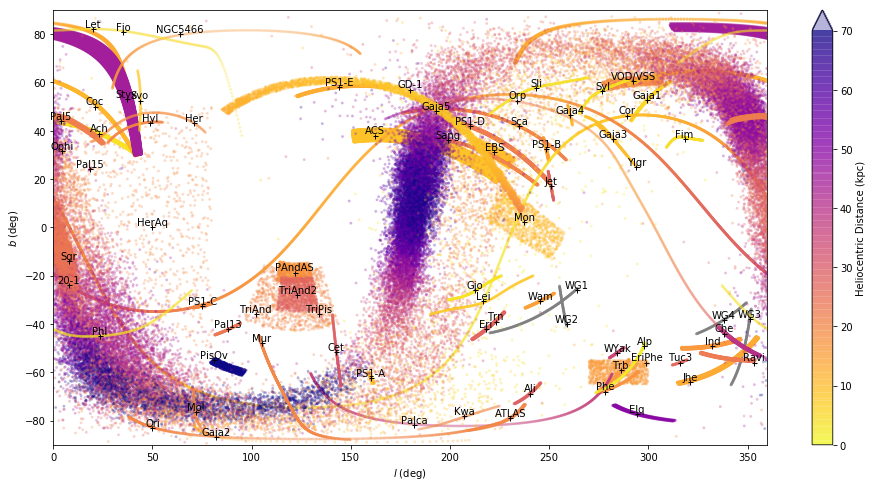

In [8]:
mwsts=galstreams.MWStreams(verbose=False)

fig=plt.figure(1,figsize=(16,8))
ax=fig.add_subplot(111)
cmapp=plt.cm.plasma_r
cmapp.set_under('grey')
mwsts.plot_stream_compilation(ax,plot_colorbar=True,
                              scat_kwargs=dict(vmin=0.,vmax=70.,cmap=cmapp, alpha=0.3),
                              use_shortnames=True, 
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), 
                              cootype='gal',verbose=False)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$l$ (deg)')
ax.set_ylabel('$b$ (deg)')

plt.savefig('../../examples/quickex.png')


Skipping stream WG1, no valid Rhel => no valid galactocentric attributes
Skipping stream WG2, no valid Rhel => no valid galactocentric attributes
Skipping stream WG3, no valid Rhel => no valid galactocentric attributes
Skipping stream WG4, no valid Rhel => no valid galactocentric attributes


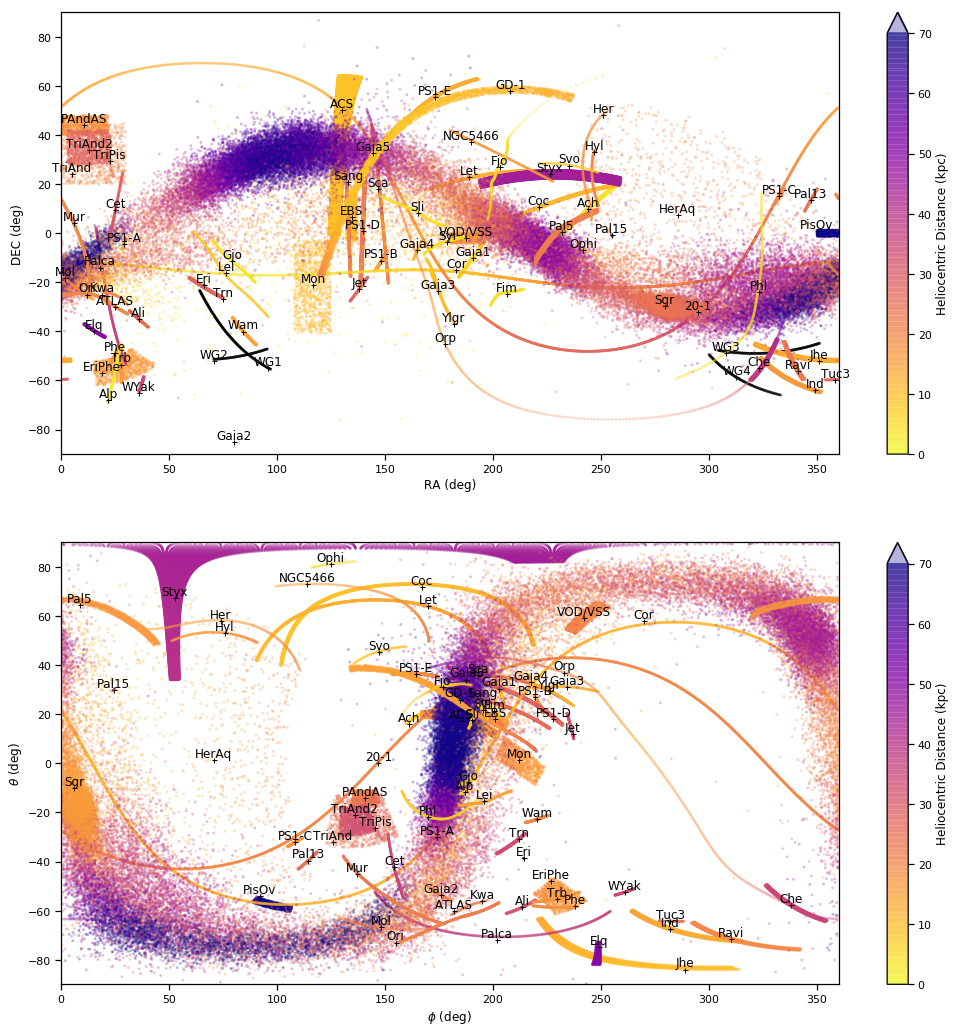

In [9]:
sns.set_context('notebook')
mwsts=galstreams.MWStreams(verbose=False)

fig=plt.figure(1,figsize=(15,15))
fig.subplots_adjust(left=0.08,right=0.98,bottom=0.08,top=0.98)
cmapp=plt.cm.plasma_r
cmapp.set_under('k')
cmapp.set_bad('r')
ax=fig.add_subplot(211)
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=70.,cmap=cmapp, alpha=0.3),
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), #exclude_streams=['Sgr-L10'],
                              cootype='equ',verbose=False,use_shortnames=True)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)');

#ax=fig.add_subplot(312)
#mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=90.,cmap=cmapp, alpha=0.3),
#                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), #exclude_streams=['Sgr-L10'],
#                              cootype='gal',verbose=False,use_shortnames=True)
#ax.set_xlim(0.,360.)
#ax.set_ylim(-90.,90.)
#ax.set_xlabel('$l$ (deg)')
#ax.set_ylabel('$b$ (deg)');

ax=fig.add_subplot(212)
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=0.,vmax=70.,cmap=cmapp, alpha=0.3),
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), #exclude_streams=[],
                              cootype='GC',verbose=False,use_shortnames=True)
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\\theta$ (deg)');

plt.savefig('../../examples/quickex_ra_phitheta.png')


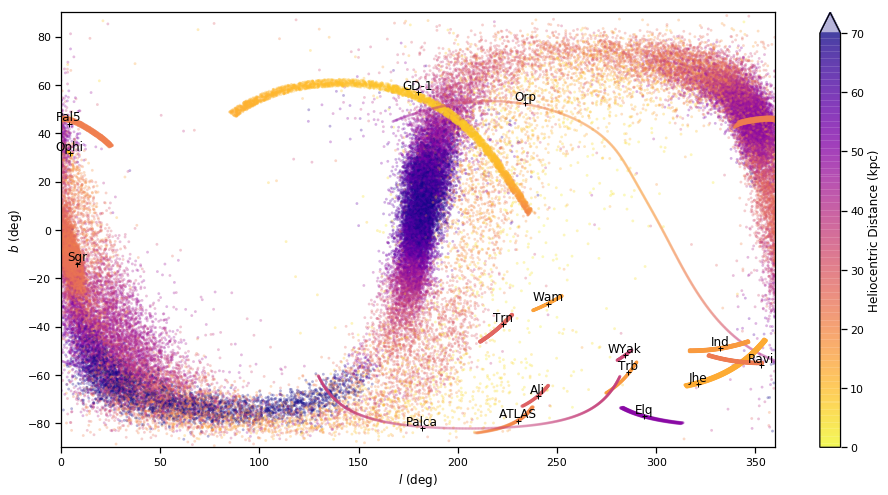

In [4]:
mwsts=galstreams.MWStreams(verbose=False)

fig=plt.figure(1,figsize=(16,8))
ax=fig.add_subplot(111)
cmapp=plt.cm.plasma_r
cmapp.set_under('grey')
mwsts.plot_stream_compilation(ax,plot_colorbar=True,
                              scat_kwargs=dict(vmin=0.,vmax=70.,cmap=cmapp, alpha=0.3),
                              use_shortnames=True, 
                              cb_kwargs=dict(label='Heliocentric Distance (kpc)'), 
                              cootype='gal',verbose=False,
                              include_only=["Sgr-L10","GD-1","Pal5",'Orphan',
                                            'ATLAS','Ophiucus','Indus', 'Jhelum', 'Ravi',
                                            'Elqui', 'Aliqa_Uma', 'Turbio', 
                                            'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca'])
ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
ax.set_xlabel('$l$ (deg)')
ax.set_ylabel('$b$ (deg)')

plt.savefig('/Users/cmateu/Desktop/quickex_real.png')

In [10]:
mwsts.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiucus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])